In [1]:
!pip install opendatasets
!pip install pandas
%pip install seaborn
%pip install graphviz
%pip install fastai
%pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /usr/local/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.imports import *
np.set_printoptions(linewidth=130)
import pandas as pd

In [3]:
df = pd.read_csv('spaceship-titanic/train.csv')
tst_df = pd.read_csv('spaceship-titanic/test.csv')

In [4]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
modes = df.mode().iloc[0]

In [7]:
def add_data(df):
    df['FoodCourt'] = df.FoodCourt.fillna(0)
    df['ShoppingMall'] = df.ShoppingMall.fillna(0)
    df['RoomService'] = df.RoomService.fillna(0)
    df['Spa'] = df.Spa.fillna(0)
    df['VRDeck'] = df.VRDeck.fillna(0)
    df.fillna(modes, inplace=True)
    df['Fare'] = df['FoodCourt'] + df['ShoppingMall'] + df['RoomService']+ df['Spa']+ df['VRDeck']
    df['LogFare'] = np.log(df['Fare']+1)
        

add_data(df)
add_data(tst_df)

/var/folders/tk/jl3yfcz52s9020z4_8dbfkvw0000gn/T/ipykernel_61206/3892134768.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(modes, inplace=True)
/var/folders/tk/jl3yfcz52s9020z4_8dbfkvw0000gn/T/ipykernel_61206/3892134768.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(modes, inplace=True)


In [8]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Fare,LogFare
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0.000000
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,6.602588
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,9.248021
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,8.551981
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,6.995766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,8536.0,9.052165
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,0.000000
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,1873.0,7.535830
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,4637.0,8.442039


array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'RoomService'}>, <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>, <Axes: title={'center': 'Spa'}>, <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: title={'center': 'LogFare'}>, <Axes: >]], dtype=object)

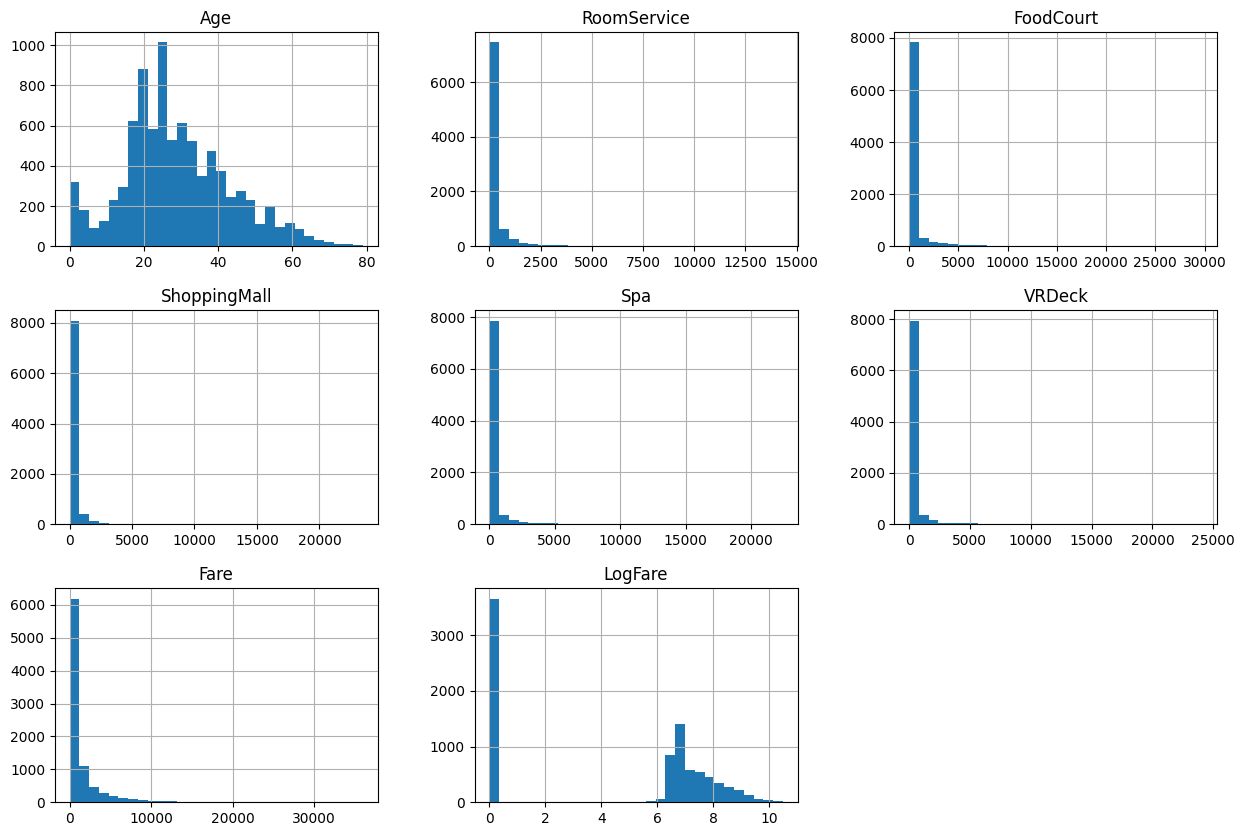

In [9]:
df.hist(bins=30, figsize=(15, 10))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Fare          8693 non-null   float64
 15  LogFare       8693 non-null   float64
dtypes: bool(3), float64(8), object(5)
memory usage: 908.5+ KB


In [11]:
df.describe(include=[object])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Alraium Disivering
freq,1,4803,207,6097,202


In [12]:
df = pd.get_dummies(df, columns=["HomePlanet","Destination"])
tst_df = pd.get_dummies(tst_df, columns=["HomePlanet","Destination"])

In [13]:
tst_df.describe(include=[bool])

,CryoSleep,VIP,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
count,4277,4277,4277,4277,4277,4277,4277,4277
unique,2,2,2,2,2,2,2,2
top,False,False,True,False,False,False,False,True
freq,2733,4203,2350,3275,3352,3436,3889,3048


In [14]:
def proc_bool(df):
    df["CryoSleep"] = df["CryoSleep"].astype(int)
    df["VIP"] = df["VIP"].astype(int)
    df["HomePlanet_Earth"] = df["HomePlanet_Earth"].astype(int)
    df["HomePlanet_Europa"] = df["HomePlanet_Europa"].astype(int)
    df["HomePlanet_Mars"] = df["HomePlanet_Mars"].astype(int)
    df["Destination_55_Cancri-e"] = df["Destination_55 Cancri e"].astype(int)
    df["Destination_PSO_J318.5-22"] = df["Destination_PSO J318.5-22"].astype(int)
    df["Destination_TRAPPIST-1e"] = df["Destination_TRAPPIST-1e"].astype(int)

proc_bool(df)
proc_bool(tst_df)

In [15]:
df["Transported"] = df["Transported"].astype(int)

In [16]:
df = df.drop(columns=['Destination_55 Cancri e'])
df = df.drop(columns=['Destination_PSO J318.5-22'])
tst_df = tst_df.drop(columns=['Destination_55 Cancri e'])
tst_df = tst_df.drop(columns=['Destination_PSO J318.5-22'])

In [17]:
df

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Fare,LogFare,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_TRAPPIST-1e,Destination_55_Cancri-e,Destination_PSO_J318.5-22
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,0.000000,0,1,0,1,0,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,736.0,6.602588,1,0,0,1,0,0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,10383.0,9.248021,0,1,0,1,0,0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,5176.0,8.551981,0,1,0,1,0,0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1091.0,6.995766,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,8536.0,9.052165,0,1,0,0,1,0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0.0,0.000000,1,0,0,0,0,1
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1873.0,7.535830,1,0,0,1,0,0
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,4637.0,8.442039,0,1,0,0,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   CryoSleep                  8693 non-null   int64  
 2   Cabin                      8693 non-null   object 
 3   Age                        8693 non-null   float64
 4   VIP                        8693 non-null   int64  
 5   RoomService                8693 non-null   float64
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Name                       8693 non-null   object 
 11  Transported                8693 non-null   int64  
 12  Fare                       8693 non-null   float64
 13  LogFare                    8693 non-null   float

In [19]:
cats=["CryoSleep","VIP", "HomePlanet_Earth", "HomePlanet_Europa", "HomePlanet_Mars", "Destination_TRAPPIST-1e", "Destination_55_Cancri-e", "Destination_PSO_J318.5-22"]
conts=['Age', 'LogFare']
dep="Transported"

In [20]:
df.Transported.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

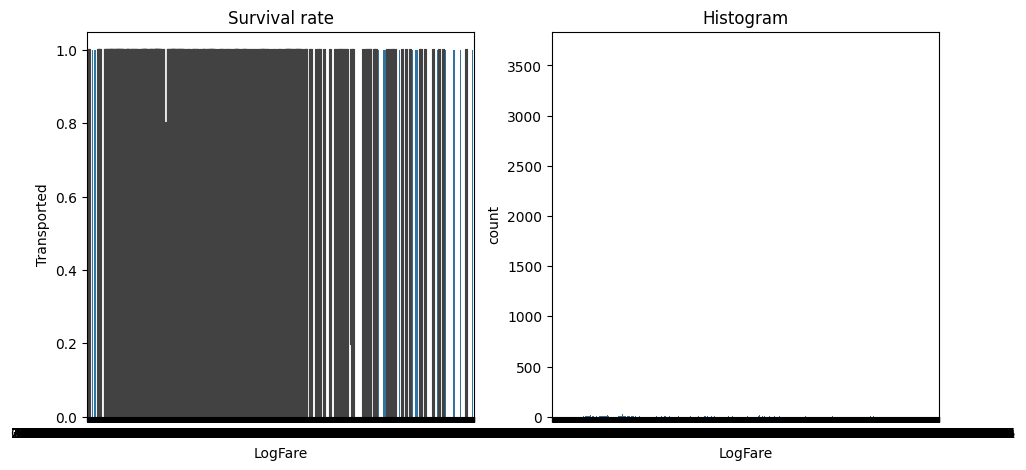

In [21]:
import seaborn as sns

fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.barplot(data=df, y=dep, x="LogFare", ax=axs[0]).set(title="Survival rate")
sns.countplot(data=df, x="LogFare", ax=axs[1]).set(title="Histogram");

In [23]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)

In [24]:
def xs_y(df):
    xs = df[cats+conts].copy()
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df)
val_xs,val_y = xs_y(val_df)

In [25]:
preds = val_xs.LogFare==1

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(val_y, preds)

0.5022999080036799

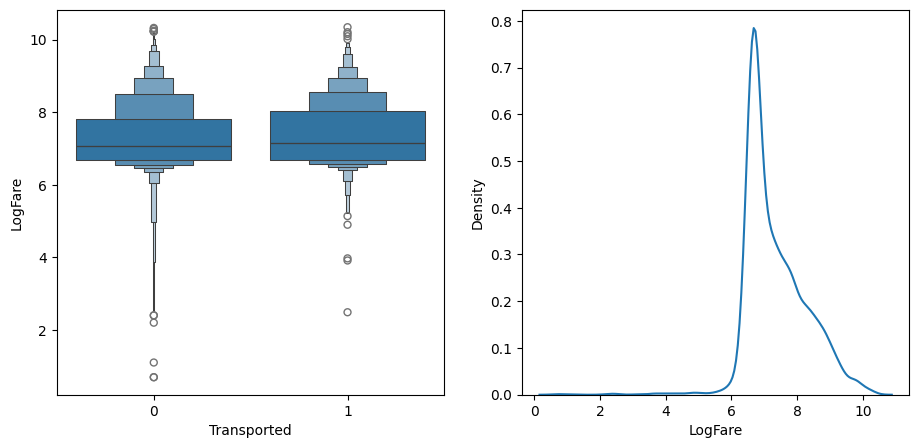

In [27]:
df_fare = trn_df[trn_df.LogFare>0]
fig,axs = plt.subplots(1,2, figsize=(11,5))
sns.boxenplot(data=df_fare, x=dep, y="LogFare", ax=axs[0])
sns.kdeplot(data=df_fare, x="LogFare", ax=axs[1]);

In [28]:
preds = val_xs.LogFare>7.5

In [29]:
mean_absolute_error(val_y, preds)

0.5860165593376265

In [30]:
def _side_score(side, y):
    tot = side.sum()
    if tot<=1: return 0
    return y[side].std()*tot

In [31]:
def score(col, y, split):
    lhs = col<=split
    return (_side_score(lhs,y) + _side_score(~lhs,y))/len(y)

In [32]:
score(trn_xs["CryoSleep"], trn_y, 0.5)

0.4427274084379482

In [33]:
score(trn_xs["LogFare"], trn_y, 2.7)

0.4386722115002497

In [34]:
def iscore(nm, split):
    col = trn_xs[nm]
    return score(col, trn_y, split)

from ipywidgets import interact
interact(nm=conts, split=15.5)(iscore);

0.49732738499479706

interactive(children=(Dropdown(description='nm', options=('Age', 'LogFare'), value='Age'), FloatSlider(value=1…

In [35]:
interact(nm=cats, split=2)(iscore);

0.5000218277565598

interactive(children=(Dropdown(description='nm', options=('CryoSleep', 'VIP', 'HomePlanet_Earth', 'HomePlanet_…

In [36]:
nm = "LogFare"
col = trn_xs[nm]
unq = col.unique()
unq.sort()
unq

array([ 0.        ,  0.69314718,  1.09861229, ..., 10.29583365, 10.3247932 , 10.34415892])

In [37]:
scores = np.array([score(col, trn_y, o) for o in unq if not np.isnan(o)])
unq[scores.argmin()]

0.0

In [38]:
def min_col(df, nm):
    col,y = df[nm],df[dep]
    unq = col.dropna().unique()
    scores = np.array([score(col, y, o) for o in unq if not np.isnan(o)])
    idx = scores.argmin()
    return unq[idx],scores[idx]

min_col(trn_df, "Age")

(5.0, 0.49588222217088634)

In [39]:
cols = cats+conts
{o:min_col(trn_df, o) for o in cols}

{'CryoSleep': (0, 0.4427274084379482),
 'VIP': (0, 0.4997003165253164),
 'HomePlanet_Earth': (0, 0.49262732535926257),
 'HomePlanet_Europa': (0, 0.4921228311603196),
 'HomePlanet_Mars': (0, 0.4999212060886803),
 'Destination_TRAPPIST-1e': (0, 0.49805643699129726),
 'Destination_55_Cancri-e': (0, 0.4975146234286769),
 'Destination_PSO_J318.5-22': (1, 0.5000218277565598),
 'Age': (5.0, 0.49588222217088634),
 'LogFare': (0.0, 0.4381677196846658)}

In [40]:
cols.remove("CryoSleep")
isSleep = trn_df.CryoSleep==1
sleep,noSleep = trn_df[isSleep],trn_df[~isSleep]

In [41]:
{o:min_col(sleep, o) for o in cols}

{'VIP': (0, 0.3837817238636689),
 'HomePlanet_Earth': (0, 0.3324940920248624),
 'HomePlanet_Europa': (0, 0.33755676507769095),
 'HomePlanet_Mars': (0, 0.3786057986987219),
 'Destination_TRAPPIST-1e': (0, 0.3843517005617657),
 'Destination_55_Cancri-e': (0, 0.3740458872508508),
 'Destination_PSO_J318.5-22': (0, 0.3807357889360303),
 'Age': (25.0, 0.38204553257058477),
 'LogFare': (0.0, 0.38524640908573105)}

In [42]:
{o:min_col(noSleep, o) for o in cols}

{'VIP': (1, 0.4730642283444852),
 'HomePlanet_Earth': (0, 0.4726119049767322),
 'HomePlanet_Europa': (0, 0.4709438743367081),
 'HomePlanet_Mars': (0, 0.4726373259650845),
 'Destination_TRAPPIST-1e': (0, 0.4727980400075047),
 'Destination_55_Cancri-e': (0, 0.47260926249874624),
 'Destination_PSO_J318.5-22': (1, 0.4730642283444852),
 'Age': (12.0, 0.46380962227595895),
 'LogFare': (0.0, 0.4613833215313755)}

In [43]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

m = DecisionTreeClassifier(max_leaf_nodes=4).fit(trn_xs, trn_y);

In [44]:
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))


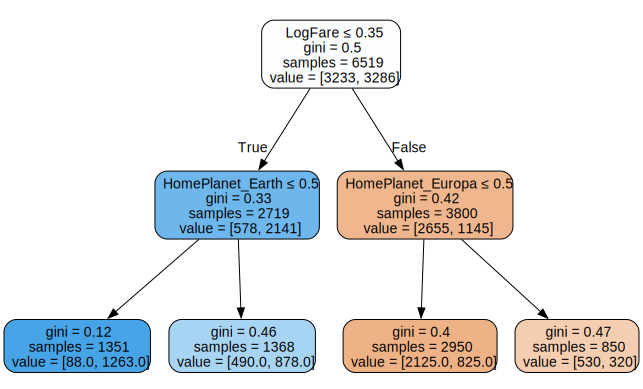

In [45]:
draw_tree(m, trn_xs, size=10)

In [46]:
def gini(cond):
    act = df.loc[cond, dep]
    return 1 - act.mean()**2 - (1-act).mean()**2

In [47]:
gini(df.CryoSleep=='noSleep'), gini(df.CryoSleep=='sleep')

(nan, nan)

In [48]:
mean_absolute_error(val_y, m.predict(val_xs))

0.25850965961361544

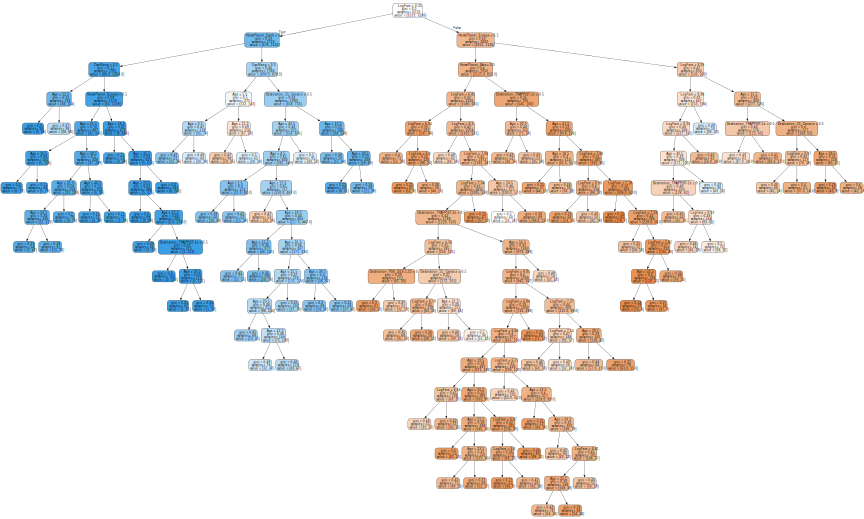

In [49]:
m = DecisionTreeClassifier(min_samples_leaf=50)
m.fit(trn_xs, trn_y)
draw_tree(m, trn_xs, size=12)

In [50]:
mean_absolute_error(val_y, m.predict(val_xs))

0.2667893284268629

In [51]:
tst_xs,_ = xs_y(tst_df)

def subm(preds, suff):
    tst_df['Transported'] = preds
    sub_df = tst_df[['PassengerId','Transported']]
    sub_df.to_csv(f'sub-{suff}.csv', index=False)

subm(m.predict(tst_xs), 'tree')

In [52]:
sub_df = pd.read_csv('sub-tree.csv')

In [53]:
sub_df['Transported'] = sub_df['Transported'].astype(bool)

In [54]:
sub_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [55]:
sub_df.to_csv('subTree.csv', index=False)

In [56]:
# The Random Forest

In [57]:
def get_tree(prop=0.75):
    n = len(trn_y)
    idxs = random.choice(n, int(n*prop))
    return DecisionTreeClassifier(min_samples_leaf=5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [58]:
trees = [get_tree() for t in range(100)]

In [70]:
all_probs = [t.predict(val_xs) for t in trees]
avg_probs = np.stack(all_probs).mean(0)

mean_absolute_error(val_y, avg_probs)

0.3256163753449862

In [76]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
random_state = 123
rf = RandomForestClassifier(100, min_samples_leaf=5)
classifier  = GradientBoostingClassifier(random_state=random_state)
rf.fit(trn_xs, trn_y);
mean_absolute_error(val_y, rf.predict(val_xs))

0.2626494940202392

In [77]:
subm(rf.predict(tst_xs), 'rf')

In [78]:
rfdf = pd.read_csv('sub-rf.csv')

In [79]:
rfdf['Transported'] = rfdf['Transported'].astype(bool)

In [80]:
rfdf.to_csv('subrf.csv', index=False)

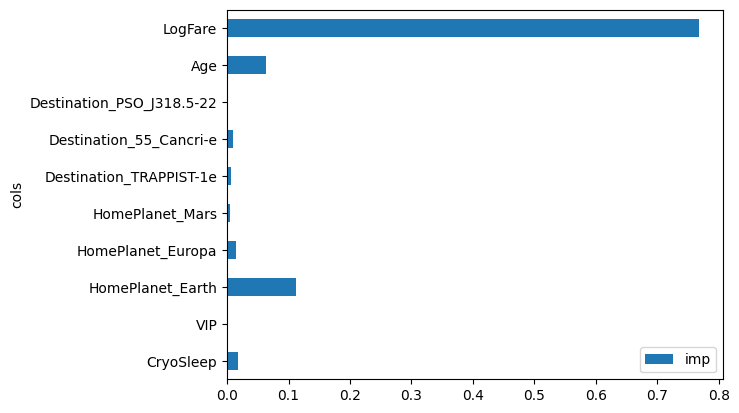

In [81]:
pd.DataFrame(dict(cols=trn_xs.columns, imp=m.feature_importances_)).plot('cols', 'imp', 'barh');